In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Data Preprocessing

In [2]:
census=pd.read_csv('/Users/livi/Documents/2020 Fall/data mining/Project 1/adult.test',delimiter=', ', header=1)
n='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
box=census.columns
census.columns=n
census.loc[-1]=box
census.index=census.index+1
census=census.sort_index()
print(census.shape)
census.head()
#census.head().to_csv('Rawcensus.csv') 

(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [3]:
for col in list(census.columns):
    print(col+':',len(census[col].unique()))

age: 74
workclass: 9
fnlwgt: 12787
education: 16
education-num: 17
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital-gain: 114
capital-loss: 83
hours-per-week: 90
native-country: 41
income: 2


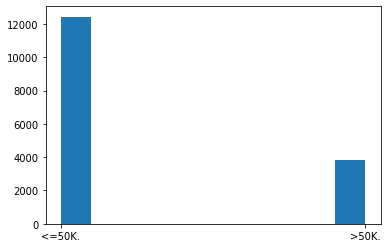

In [4]:
'''numeric_columns=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
f = plt.figure(figsize=(15,8))
for i,col in enumerate(numeric_columns):
    ax=plt.subplot(2, 3,i+1)
    ax.hist(census[col].astype(float), bins=10)
    ax.set_xlabel(col)
    ax.set_ylabel('value')
#plt.savefig('distribution of numeric values.jpg')
plt.show()'''

plt.hist(census.income)
plt.show()

In [5]:
def updateTable(LS,table,column,NV):
    new=[NV[0] if i in range(LS[0][0],LS[0][1]) else NV[1] if i in range(LS[1][0],LS[1][1]) else NV[2] for i in census[column].astype(int)]
    table[column]=new
    return table

In [6]:
LS=[(16,31),(31,51),(51)]
NV=['young_adult','adult','senior_adult']
census=updateTable(LS,census,'age',NV)

In [7]:
LS=[(13492, 139364), (139364, 211208), (211208, 1490400)]
NV=['A','B','C']
census=updateTable(LS,census,'fnlwgt',NV)

In [8]:
LS=[(1, 9), (9, 10), (10, 20)]
NV=['Basic','Medium','High']
census=updateTable(LS,census,'education-num',NV)

In [9]:
NV=['capital_gain_0','capital_gain_1']
new_capital_gain=[NV[0] if i!=0 else NV[1] for i in census['capital-gain'].astype(float)]
census['capital-gain']=new_capital_gain

In [10]:
NV=['capital_loss_0','capital_loss_1']
new_capital_loss=[NV[0] if i!=0 else NV[1] for i in census['capital-loss'].astype(float)]
census['capital-loss']=new_capital_loss

In [11]:
NV=['below 40','40','above 40']
new_hours=[NV[0] if i<40 else NV[1] if i==40 else NV[2] for i in census['hours-per-week'].astype(float)]
census['hours-per-week']=new_hours

In [12]:
census.head()
#census.head().to_csv('Cleanedcensus.csv')
census.head().to_clipboard()

In [13]:
for col in list(census.columns):
    print(col+':',len(census[col].unique()))

age: 3
workclass: 9
fnlwgt: 3
education: 16
education-num: 3
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital-gain: 2
capital-loss: 2
hours-per-week: 3
native-country: 41
income: 2


In [14]:
'''numeric_columns=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
f = plt.figure(figsize=(17,8))
for i,col in enumerate(numeric_columns):
    ax=plt.subplot(2, 3,i+1)
    ax.hist(census[col], bins=10)
    ax.set_xlabel(col)
    ax.set_ylabel('value')
#plt.savefig('distribution of cat values.jpg')
plt.show()'''

"numeric_columns=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']\nf = plt.figure(figsize=(17,8))\nfor i,col in enumerate(numeric_columns):\n    ax=plt.subplot(2, 3,i+1)\n    ax.hist(census[col], bins=10)\n    ax.set_xlabel(col)\n    ax.set_ylabel('value')\n#plt.savefig('distribution of cat values.jpg')\nplt.show()"

In [15]:
#break everything to n parts
n=3
num_elements=round(len(census)/n)
print(num_elements)
elementsindex_range=[i for i in range(0,len(census),num_elements)]
print(elementsindex_range)
elementsindex_range1=elementsindex_range[1:]
elementsindex_range1.append(len(census)-1)
print(elementsindex_range1)
print([i for i in zip(elementsindex_range,elementsindex_range1)])


5427
[0, 5427, 10854]
[5427, 10854, 16280]
[(0, 5427), (5427, 10854), (10854, 16280)]


In [16]:
'''#test with different columns
sortedage=sorted(census['hours-per-week'].astype(int))
print([(sortedage[i],sortedage[k]) for i,k in zip(elementsindex_range,elementsindex_range1)])'''


"#test with different columns\nsortedage=sorted(census['hours-per-week'].astype(int))\nprint([(sortedage[i],sortedage[k]) for i,k in zip(elementsindex_range,elementsindex_range1)])"

In [17]:
#we need str data, otherwise there will be overlap. Numeric data need to be change to str data.
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  object
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  object
 3   education       16281 non-null  object
 4   education-num   16281 non-null  object
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  object
 11  capital-loss    16281 non-null  object
 12  hours-per-week  16281 non-null  object
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: object(15)
memory usage: 2.0+ MB


# Use the Example data and Mine data

In [18]:
 Example_data=np.array(census.astype(str))
''' Example_data=Example_data.tolist()
with open('Example_data.txt','w') as f:
    for i in Example_data:
        f.write(','.join(i))
        f.write('\n')'''

" Example_data=Example_data.tolist()\nwith open('Example_data.txt','w') as f:\n   for i in Example_data:\n       f.write(','.join(i))\n       f.write('\n')"

In [19]:
import MineApriori as AP
import UpgradeApriori as APP

In [20]:
APL,APS=AP.apriori(Example_data,minSupport=0.5)


In [21]:
rules = AP.generateRules(APL,APS, minConf=0.5)

In [22]:
#pd.DataFrame(APS.values(),APS.keys())
Ruletable=AP.printrules(rules,len(Example_data))
print(Ruletable.shape)
Ruletable.head()

(454, 9)


,Frequent Itemset(AUB),From(A),To(B),Confident Number(num of A),Support Number(num of AUB),Support Number(num of B),Confidence,Support,Lift
0,"(High, capital_loss_1)",(capital_loss_1),(High),15517,8323,8843,0.536379,0.511209,0.941196
1,"(High, capital_loss_1)",(High),(capital_loss_1),8843,8323,15517,0.941196,0.511209,0.536379
2,"(White, <=50K.)",(<=50K.),(White),12435,10456,13946,0.840852,0.642221,0.749749
3,"(White, <=50K.)",(White),(<=50K.),13946,10456,12435,0.749749,0.642221,0.840852
4,"(White, Male)",(Male),(White),10860,9561,13946,0.880387,0.587249,0.685573


In [24]:
idx=[]
for i,rule in enumerate(Ruletable['To(B)']):
    if rule.issubset({'<=50K.'}):
        idx.append(i)
APlessthan50=Ruletable.loc[idx].sort_values('Confidence',ascending=False).reset_index(drop=True)
APlessthan50['From length']=[len(i) for i in APlessthan50['From(A)']]
#Reason=APlessthan50['From']

In [26]:
APlessthan50=APlessthan50.sort_values('Frequent Itemset(AUB)',ascending=False).reset_index(drop=True)
APlessthan50.drop(columns=['From length']).astype(str)

,Frequent Itemset(AUB),From(A),To(B),Confident Number(num of A),Support Number(num of AUB),Support Number(num of B),Confidence,Support,Lift
0,"frozenset({'capital_gain_1', 'capital_loss_1',...","frozenset({'capital_gain_1', 'Private', 'capit...",frozenset({'<=50K.'}),9868,8186,12435,0.8295500608025942,0.502794668632148,0.658303176517893
1,"frozenset({'Private', '<=50K.'})",frozenset({'Private'}),frozenset({'<=50K.'}),11210,8786,12435,0.7837644959857271,0.539647441803329,0.7065540812223563
2,"frozenset({'White', 'capital_gain_1', '<=50K.'...","frozenset({'White', 'capital_gain_1', 'United-...",frozenset({'<=50K.'}),11135,8865,12435,0.796138302649304,0.5444997236042012,0.7129071170084439
3,"frozenset({'White', 'United-States', 'capital_...","frozenset({'White', 'United-States', 'capital_...",frozenset({'<=50K.'}),12236,9273,12435,0.7578457012095456,0.5695596093606043,0.745717732207479
4,"frozenset({'United-States', '<=50K.'})",frozenset({'United-States'}),frozenset({'<=50K.'}),14662,11139,12435,0.7597190015004774,0.6841717339229777,0.8957780458383595
5,"frozenset({'White', 'capital_gain_1', 'capital...","frozenset({'White', 'capital_gain_1', 'capital...",frozenset({'<=50K.'}),12103,9689,12435,0.8005453193423119,0.5951108654259566,0.7791716928025734
6,"frozenset({'White', '<=50K.', 'capital_loss_1'})","frozenset({'White', 'capital_loss_1'})",frozenset({'<=50K.'}),13272,10121,12435,0.7625828812537673,0.621644862109207,0.8139123441897869
7,"frozenset({'<=50K.', 'United-States', 'capital...","frozenset({'United-States', 'capital_loss_1'})",frozenset({'<=50K.'}),13960,10781,12435,0.7722779369627507,0.6621829125975063,0.8669883393646964
8,"frozenset({'<=50K.', 'capital_loss_1'})",frozenset({'capital_loss_1'}),frozenset({'<=50K.'}),15517,12042,12435,0.7760520719211188,0.7396351575456053,0.9683956574185766
9,"frozenset({'White', 'capital_gain_1', 'United-...","frozenset({'White', 'capital_gain_1', 'United-...",frozenset({'<=50K.'}),11771,9176,12435,0.7795429445246793,0.5636017443645968,0.7379171692802573


In [28]:
Test=APlessthan50
Test.index
print(Test.shape)
Test.sort_values(by=['Frequent Itemset(AUB)','From length'],inplace=True)
Test.drop_duplicates(subset='Frequent Itemset(AUB)',inplace=True)
print(Test.shape)

(19, 10)
(19, 10)


In [29]:
for col in ['Frequent Itemset(AUB)','From(A)','To(B)']:
    newcol=[]
    newcol=[list(i) for i in Test[col]]
    Test[col]=newcol
Test.reset_index(drop=True,inplace=True)
#Test.drop(columns=['From length']).astype(str).to_csv('Below 50K.csv')
Test.head()

,Frequent Itemset(AUB),From(A),To(B),Confident Number(num of A),Support Number(num of AUB),Support Number(num of B),Confidence,Support,Lift,From length
0,"[capital_gain_1, <=50K.]",[capital_gain_1],[<=50K.],14958,11926,12435,0.797299,0.732510,0.959067,1
1,"[Private, <=50K.]",[Private],[<=50K.],11210,8786,12435,0.783764,0.539647,0.706554,1
2,"[United-States, <=50K.]",[United-States],[<=50K.],14662,11139,12435,0.759719,0.684172,0.895778,1
3,"[White, <=50K., capital_loss_1]","[White, capital_loss_1]",[<=50K.],13272,10121,12435,0.762583,0.621645,0.813912,2
4,"[White, capital_gain_1, <=50K.]","[White, capital_gain_1]",[<=50K.],12777,10024,12435,0.784535,0.615687,0.806112,2


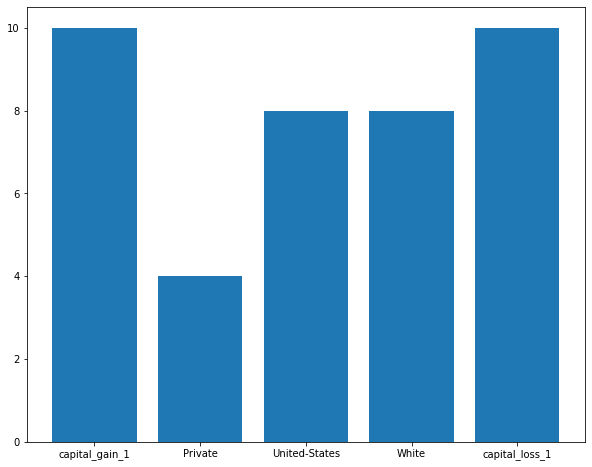

In [31]:
Reason=[list(i) for i in Test['From(A)']]
Reason_bar={}
for i in Reason:
    for ii in i:
        Reason_bar[ii]=Reason_bar.get(ii,0)+1

f = plt.figure(figsize=(10,8))
plt.bar(Reason_bar.keys(),Reason_bar.values())
plt.show()

### for larger than 50 K


In [31]:
#find the itemset contain >50
dx=[]
for i,rule in enumerate(Ruletable['Frequent itemset']):
    if rule.issuperset({'>50K.'}):
        idx.append(i)
APlargerthan50=Ruletable.loc[idx]
APlargerthan50.head()

,Frequent itemset,From,To,Confident number,Support Number,Confidence,Support,Lift
40,"(United-States, >50K.)",(>50K.),(United-States),3846,3523,0.916017,0.216387,4.233229
41,"(Married-civ-spouse, >50K.)",(>50K.),(Married-civ-spouse),3846,3292,0.855954,0.202199,4.233229
42,"(White, >50K.)",(>50K.),(White),3846,3490,0.907436,0.214360,4.233229
43,"(capital_loss_1, >50K.)",(>50K.),(capital_loss_1),3846,3475,0.903536,0.213439,4.233229
530,"(United-States, White, >50K.)","(White, >50K.)",(United-States),3490,3288,0.942120,0.201953,4.665043


In [32]:
idx=[]
for i,rule in enumerate(Ruletable['To']):
    if rule.issubset({'>50K.'}):
        idx.append(i)
APlargerthan50=Ruletable.loc[idx]
APlargerthan50['From length']=[len(i) for i in APlargerthan50['From']]

Test=APlargerthan50
Test.index
print(Test.shape)
Test.sort_values(by=['Frequent itemset','From length'],inplace=True)
Test.drop_duplicates(subset='Frequent itemset',inplace=True)
print(Test.shape)

(0, 9)
(0, 9)


In [30]:
for col in ['Frequent itemset','From','To']:
    newcol=[]
    newcol=[list(i) for i in Test[col]]
    Test[col]=newcol
Test.reset_index(drop=True,inplace=True)
#Test.drop(columns=['From length']).astype(str).to_csv('Below 50K.csv')
Test.head()


,Frequent itemset,From,To,Confident number,Support Number,Confidence,Support,Lift,From length


In [ ]:
Reason=[list(i) for i in Test['From']]
Reason_bar={}
for i in Reason:
    for ii in i:
        Reason_bar[ii]=Reason_bar.get(ii,0)+1

f = plt.figure(figsize=(10,8))
plt.bar(Reason_bar.keys(),Reason_bar.values())
plt.show()

Need to further check


In [29]:
#select the longest, if the rest is not subset of the longest then keep
def subsetremove(redSet,n):
    Base=redSet[n]
    Notbase_idx=[n]
    for i in redSet.index:
        if (not redSet[i].issubset(Base)) and i!=n:
            Notbase_idx.append(i)
    return Notbase_idx

Test=APlessthan50
orginal_index=Test.index
for i in orginal_index:
    orginal_index_copy=set([i for i in orginal_index])
    try:
        Notbase_idx=subsetremove(Test['Frequent itemset'],i)
        #print(Test.loc[Notbase_idx,['Frequent itemset']].reset_index(drop=True))
        orginal_index_copy-=set(Notbase_idx)
        print(orginal_index_copy)
        print('*'*10)
        Test=Test.loc[Notbase_idx]
    except:
        pass
#Test.loc[Notbase_idx,['Frequent itemset','From','Confidence','From length']]
for i,F in enumerate(Test['From']):
    print(F,Test.loc[i,])


set()
**********
{3, 4, 5, 6, 7, 16}
**********
{3, 4, 5, 6, 7, 16}
**********
{3, 4, 5, 6, 7, 10, 11, 16, 18}
**********
{3, 4, 5, 6, 7, 10, 11, 15, 16, 18}
**********
{3, 4, 5, 6, 7, 10, 11, 15, 16, 18}
**********
{3, 4, 5, 6, 7, 10, 11, 15, 16, 18}
**********
{3, 4, 5, 6, 7, 9, 10, 11, 15, 16, 17, 18}
**********
{3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 17, 18}
**********
{3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 17, 18}
**********
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
**********
frozenset({'capital_loss_1', 'White', 'United-States', 'capital_gain_1'}) Frequent itemset    (capital_loss_1, Private, <=50K., capital_gain_1)
From                        (capital_loss_1, capital_gain_1, Private)
To                                                           (<=50K.)
Confident number                                                 9868
Support Number                                                   8186
Confidence                                                    0.82955
S